# Algorithm Trading Basics

## 1. Importing and Refining Data

Importing all the necessary libraries.
Alpha_vintage library is used to get the financial data.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from alpha_vantage.timeseries import TimeSeries

In [88]:
ts = TimeSeries(key = 'GKR7N17NQ0AOYH7T', output_format='pandas')

In [89]:
stock_AAPL, metadata = ts.get_daily_adjusted('AAPL', outputsize='full')
stock_MSFT, metadata = ts.get_daily_adjusted('MSFT', outputsize='full')
stock_F, metadata = ts.get_daily_adjusted('F', outputsize='full')
stock_T, metadata = ts.get_daily_adjusted('T', outputsize='full')
stock_T

ConnectionError: HTTPSConnectionPool(host='www.alphavantage.co', port=443): Max retries exceeded with url: /query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AAPL&outputsize=full&apikey=GKR7N17NQ0AOYH7T&datatype=json (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001E0D255C748>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

The Corona Virus has impacted the prices of each and every stock and hence I would remove the stock data from 8th Jan'20.

In [ ]:
stock_F=stock_F[50:]
stock_AAPL=stock_AAPL[50:]
stock_MSFT=stock_MSFT[50:]
stock_T=stock_T[50:]

In [159]:
stock_T

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2020-01-09,38.92,39.00,38.55,38.80,38.8000,39446771.0,0.52,1.0
2020-01-08,39.33,39.55,39.29,39.37,38.8493,40514380.0,0.00,1.0
2020-01-07,39.08,39.30,38.98,39.25,38.7309,28201931.0,0.00,1.0
2020-01-06,38.99,39.15,38.82,39.10,38.5829,38645625.0,0.00,1.0
2020-01-03,38.58,39.20,38.57,39.06,38.5434,27414030.0,0.00,1.0
...,...,...,...,...,...,...,...,...
2000-03-28,42.69,43.38,42.44,42.50,14.3715,6264600.0,0.00,1.0
2000-03-27,43.13,43.63,42.44,43.19,14.6048,5878800.0,0.00,1.0
2000-03-24,43.06,43.69,42.56,43.00,14.5406,5129800.0,0.00,1.0


In [170]:
df_AAPL = pd.DataFrame(stock_AAPL)
df_MSFT = pd.DataFrame(stock_MSFT)
df_F = pd.DataFrame(stock_F)
df_T = pd.DataFrame(stock_T)

In [171]:
df_T.drop(df_T.columns[[6,7]], axis = 1, inplace = True) 
df_F.drop(df_F.columns[[6,7]], axis = 1, inplace = True) 
df_AAPL.drop(df_AAPL.columns[[6,7]], axis = 1, inplace = True) 
df_MSFT.drop(df_MSFT.columns[[6,7]], axis = 1, inplace = True) 

In [185]:
df_T.columns=['Open','High','Low','Close','Adj Close','Volume']
df_F.columns=['Open','High','Low','Close','Adj Close','Volume']
df_AAPL.columns=['Open','High','Low','Close','Adj Close','Volume']
df_MSFT.columns=['Open','High','Low','Close','Adj Close','Volume']

In [192]:
df_MSFT=df_MSFT.iloc[::-1]
df_T=df_T.iloc[::-1]
df_F=df_F.iloc[::-1]
df_AAPL=df_AAPL.iloc[::-1]

In [193]:
df_MSFT.head()

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2000-03-22,102.81,105.62,101.12,103.25,33.1952,46987900.0
2000-03-23,106.81,112.87,106.62,111.87,35.9665,74112000.0
2000-03-24,112.62,115.00,109.56,111.69,35.9087,56098400.0
2000-03-27,107.77,108.25,103.94,104.06,33.4556,55717000.0
2000-03-28,103.62,107.44,102.37,104.31,33.5360,40557200.0


In [194]:
df_MSFT.tail()

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2020-01-03,158.320,159.945,158.0600,158.62,158.1892,21121681.0
2020-01-06,157.080,159.100,156.5100,159.03,158.5981,20826702.0
2020-01-07,159.320,159.670,157.3200,157.58,157.1520,21881740.0
2020-01-08,158.930,160.800,157.9491,160.09,159.6552,27762026.0
2020-01-09,161.835,162.215,161.0300,162.09,161.6498,21399951.0


## 2. Exploratory Data Analysis

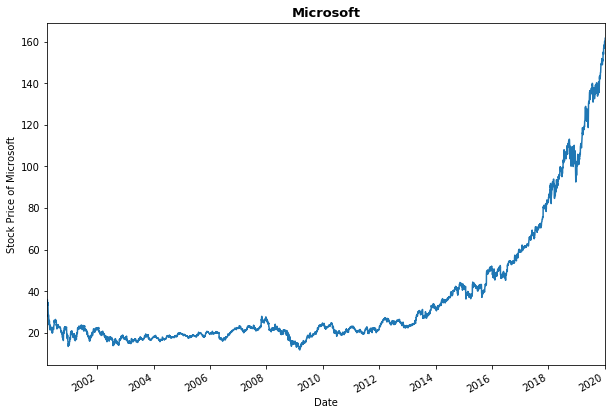

In [195]:
df_MSFT['Adj Close'].plot(figsize=(10, 7))
plt.xlabel('Date')
plt.ylabel('Stock Price of Microsoft')
plt.title('Microsoft',fontweight="bold",fontsize=13)
plt.show()

In [199]:
df_MSFT['Adj Close'].iloc[-1], df_MSFT['Adj Close'].iloc[0], df_MSFT['Adj Close'].iloc[1]

(161.6498, 33.1952, 35.9665)

Getting all the data for Adjacent Closing price in one table.

In [197]:
df_Adj_Close = pd.concat([df_MSFT['Adj Close'], df_AAPL['Adj Close'], df_F['Adj Close'],df_T['Adj Close']], axis=1)
df_Adj_Close.columns=['MSFT','AAPL','Ford','AT&T']
df_Adj_Close.head()

,MSFT,AAPL,Ford,AT&T
date,,,,
2000-03-22,33.1952,4.4695,18.8882,14.6454
2000-03-23,35.9665,4.3802,19.1028,14.7299
2000-03-24,35.9087,4.2990,19.1586,14.5406
2000-03-27,33.4556,4.3259,18.9697,14.6048
2000-03-28,33.5360,4.3126,19.1028,14.3715


Normalizing the data and then comparing them. We are normalizing the data by dividing it by it's first trading price.  

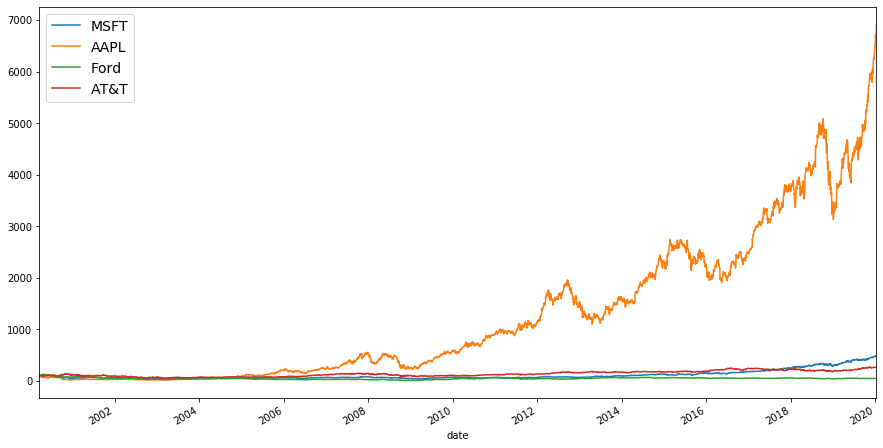

In [200]:
(df_Adj_Close / df_Adj_Close.iloc[0] *100).plot(figsize = (15, 8));
plt.legend(loc=2, prop={'size': 14})
plt.show()

If we remove Apple and then compare, we'll get a better idea.

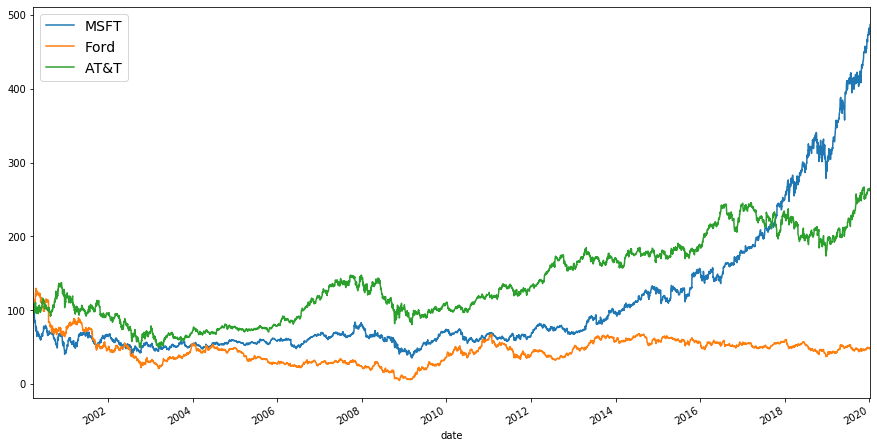

In [201]:
dummy = pd.concat([df_MSFT['Adj Close'], df_F['Adj Close'],df_T['Adj Close']], axis=1)
dummy.columns=['MSFT','Ford','AT&T']
(dummy / dummy.iloc[0] *100).plot(figsize = (15, 8));
plt.legend(loc=2, prop={'size': 14})
plt.show()

In [202]:
df_Open = pd.concat([df_MSFT['Open'], df_AAPL['Open'], df_F['Open'],df_T['Open']], axis=1)
df_Close = pd.concat([df_MSFT['Close'], df_AAPL['Close'], df_F['Close'],df_T['Close']], axis=1)
df_High = pd.concat([df_MSFT['High'], df_AAPL['High'], df_F['High'],df_T['High']], axis=1)
df_Low = pd.concat([df_MSFT['Low'], df_AAPL['Low'], df_F['Low'],df_T['Low']], axis=1)
df_Volume = pd.concat([df_MSFT['Volume'], df_AAPL['Volume'], df_F['Volume'],df_T['Volume']], axis=1)
df_Open.columns=['MSFT','AAPL','Ford','AT&T']
df_Close.columns=['MSFT','AAPL','Ford','AT&T']
df_High.columns=['MSFT','AAPL','Ford','AT&T']
df_Low.columns=['MSFT','AAPL','Ford','AT&T']
df_Volume.columns=['MSFT','AAPL','Ford','AT&T']

Now we have the trading data for all the 4 companies in data frames.

In [203]:
df_Open

,MSFT,AAPL,Ford,AT&T
date,,,,
2000-03-22,102.810,132.780,44.75,44.38
2000-03-23,106.810,142.000,43.81,42.44
2000-03-24,112.620,142.440,44.00,43.06
2000-03-27,107.770,137.630,44.19,43.13
2000-03-28,103.620,137.250,43.88,42.69
...,...,...,...,...
2020-01-03,158.320,297.150,9.31,38.58
2020-01-06,157.080,293.790,9.10,38.99
2020-01-07,159.320,299.840,9.20,39.08


<b>Moving Average</b>: 

In [204]:
df_MSFT['Window 40']=df_MSFT['Adj Close'].rolling(window=40).mean()

In [205]:
df_MSFT['Window 252']=df_MSFT['Adj Close'].rolling(window=252).mean()

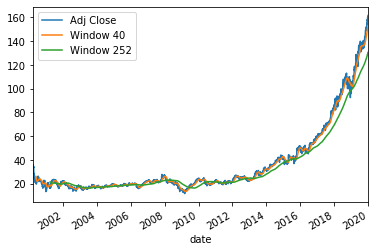

In [206]:
df_MSFT[['Adj Close', 'Window 40', 'Window 252']].plot()
plt.show()

<b>Volatility</b>: The volatility of a stock is a measurement of the change in variance in the returns of a stock over a specific period of time

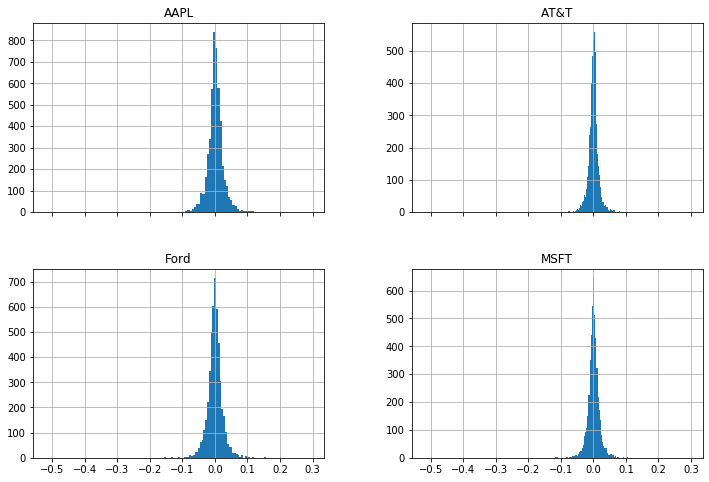

In [207]:
df_daily_pct_change = df_Adj_Close.pct_change()
df_daily_pct_change.hist(bins=100, sharex=True, figsize=(12,8))
plt.show()

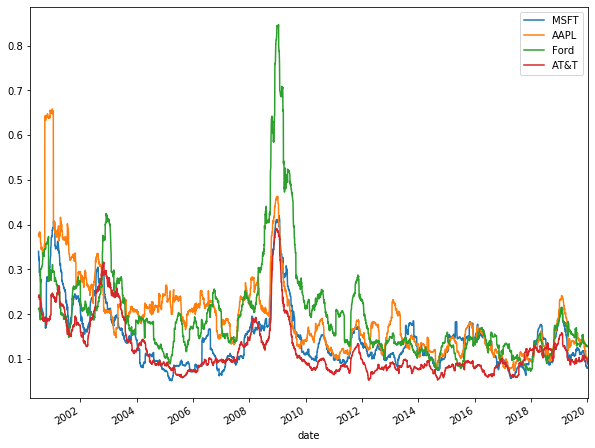

In [208]:
min_periods = 75 
vol = df_daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 
vol.plot(figsize=(10, 8))
plt.show()

## 3. Linear Modelling

Compiling the table for log(daily_returns)

In [209]:
import statsmodels.api as sm
df_log_returns=pd.DataFrame()
df_log_returns['MSFT'] = np.log(df_MSFT['Adj Close'] / df_MSFT['Adj Close'].shift(1) )
df_log_returns['AAPL'] = np.log(df_AAPL['Adj Close'] / df_AAPL['Adj Close'].shift(1) )
df_log_returns['F'] = np.log(df_F['Adj Close'] / df_F['Adj Close'].shift(1) )
df_log_returns['T'] = np.log(df_T['Adj Close'] / df_T['Adj Close'].shift(1))
df_log_returns=df_log_returns[1:]
df_log_returns

,MSFT,AAPL,F,T
date,,,,
2000-03-23,0.080183,-0.020182,0.011298,0.005753
2000-03-24,-0.001608,-0.018712,0.002917,-0.012935
2000-03-27,-0.070760,0.006238,-0.009909,0.004406
2000-03-28,0.002400,-0.003079,0.006992,-0.016103
2000-03-29,0.027235,-0.023200,0.006943,-0.005897
...,...,...,...,...
2020-01-03,-0.012530,-0.009770,-0.022545,0.005132
2020-01-06,0.002582,0.007937,-0.005447,0.001024
2020-01-07,-0.009160,-0.004714,0.009777,0.003829


In [210]:
X = sm.add_constant(df_log_returns['AAPL'])
model = sm.OLS(df_log_returns['MSFT'],X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     1029.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):          2.17e-205
Time:                        16:01:44   Log-Likelihood:                 13189.
No. Observations:                4981   AIC:                        -2.637e+04
Df Residuals:                    4979   BIC:                        -2.636e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.379e-05      0.000      0.263      0.7

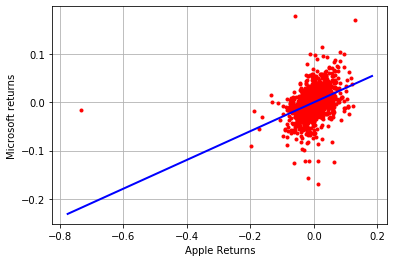

In [211]:
plt.plot(df_log_returns['AAPL'], df_log_returns['MSFT'], 'r.')
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')
plt.show()

We can cross check our results by using rolling correlation of returns.

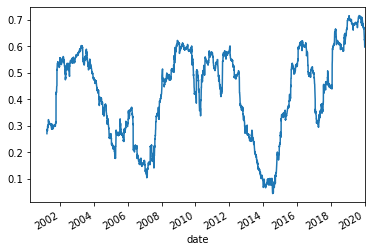

In [212]:
df_log_returns['MSFT'].rolling(window=252).corr(df_log_returns['AAPL']).plot()
plt.show()

## 4. Trading Strategies

### 4.1 Momentum Strategy
Also called divergence or trend trading. When we follow this strategy, we believe the movement of a quantity will continue in its current direction; i.e if it is moving up then it will keep on moving up and same with down. Some examples are: <br>
- Moving average crossover: Crossover occurs when the price of an asset moves from one side of a moving average to the other, this crossover represents a change in momentum and can be used as a point of making the decision to enter or exit the market.
- Dual moving average crossover: Crossover occurs when a short-term average crosses a long-term average. When the short-term average crosses the long-term average, buy signal is triggered.
- Turtle trading: The basic strategy is to buy futures on a 20-day high and sell on a 20-day low.

### 4.2 Reversion Strategy
which is also known as convergence or cycle trading. This strategy departs from the belief that the movement of a quantity will eventually reverse. This might seem a little bit abstract, but will not be so anymore when you take the example. Take a look at the mean reversion strategy, where you actually believe that stocks return to their mean and that you can exploit when it deviates from that mean.

That already sounds a whole lot more practical, right?

Another example of this strategy, besides the mean reversion strategy, is the pairs trading mean-reversion, which is similar to the mean reversion strategy. Whereas the mean reversion strategy basically stated that stocks return to their mean, the pairs trading strategy extends this and states that if two stocks can be identified that have a relatively high correlation, the change in the difference in price between the two stocks can be used to signal trading events if one of the two moves out of correlation with the other. That means that if the correlation between two stocks has decreased, the stock with the higher price can be considered to be in a short position. It should be sold because the higher-priced stock will return to the mean. The lower-priced stock, on the other hand, will be in a long position because the price will rise as the correlation will return to normal.

Besides these two most frequent strategies, there are also other ones that you might come across once in a while, such as the forecasting strategy, which attempts to predict the direction or value of a stock, in this case, in subsequent future time periods based on certain historical factors. There’s also the High-Frequency Trading (HFT) strategy, which exploits the sub-millisecond market microstructure.



### 4.3 Implementing Trading Strategies

In [213]:
short_window = 40
long_window = 100

signals = pd.DataFrame(index=df_AAPL.index)
signals['signal'] = 0.0

signals['short_mavg'] = df_AAPL['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_mavg'] = df_AAPL['Close'].rolling(window=long_window, min_periods=1, center=False).mean()
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   
signals['positions'] = signals['signal'].diff()
print(signals)

            signal  short_mavg   long_mavg  positions
date                                                 
2000-03-22     0.0  144.190000  144.190000        NaN
2000-03-23     0.0  142.750000  142.750000        0.0
2000-03-24     0.0  141.396667  141.396667        0.0
2000-03-27     0.0  140.937500  140.937500        0.0
2000-03-28     0.0  140.576000  140.576000        0.0
...            ...         ...         ...        ...
2020-01-03     1.0  272.119500  243.290550        0.0
2020-01-06     1.0  273.183500  244.198850        0.0
2020-01-07     1.0  274.157500  245.155250        0.0
2020-01-08     1.0  275.233750  246.169750        0.0
2020-01-09     1.0  276.419500  247.201050        0.0

[4982 rows x 4 columns]


In [214]:
signals.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4982 entries, 2000-03-22 to 2020-01-09
Data columns (total 4 columns):
signal        4982 non-null float64
short_mavg    4982 non-null float64
long_mavg     4982 non-null float64
positions     4981 non-null float64
dtypes: float64(4)
memory usage: 194.6 KB


In [215]:
count1=0
count2=0
count3=0
for index, row in signals.iterrows():
    if(row['positions']==0.0):
        count1=count1+1
    elif(row['positions']==1.0):
        count2=count2+1
    else:
        count3=count3+1
print(count1,count2,count3)

4936 23 23


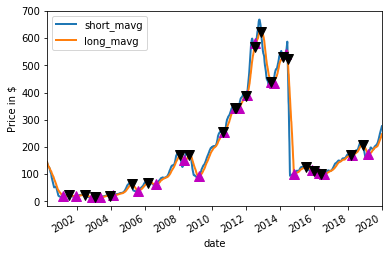

In [216]:
fig = plt.figure()

ax1 = fig.add_subplot(111,  ylabel='Price in $')
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

### 4.4 Backtesting the Trading Strategy
<br>
<b>Pitfalls</b>: Regulatory changes or macroeconomic events might influence our backtesting strategy. Also, liquidity constraints, such as the ban of short sales, can also affect our backtesting heavily.<br><br>
<b>Components</b>: 
- A data handler: which is an interface to a set of data,
- A strategy: which generates a signal to go long or go short based on the data,
- A portfolio: which generates orders and manages Profit & Loss
- An execution handler: which sends the order to the broker and receives the “fills” or signals that the stock has been bought or sold.

In [218]:
initial_capital= float(100000.0)
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 120 shares
positions['AAPL'] = 120*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(df_AAPL['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add holdings to portfolio
portfolio['holdings'] = (positions.multiply(df_AAPL['Adj Close'], axis=0)).sum(axis=1)

# Add cash to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(df_AAPL['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add total to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add returns to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.head())

            AAPL  holdings      cash     total  returns
date                                                   
2000-03-22   0.0       0.0  100000.0  100000.0      NaN
2000-03-23   0.0       0.0  100000.0  100000.0      0.0
2000-03-24   0.0       0.0  100000.0  100000.0      0.0
2000-03-27   0.0       0.0  100000.0  100000.0      0.0
2000-03-28   0.0       0.0  100000.0  100000.0      0.0


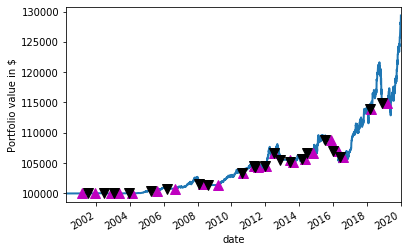

In [219]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')
plt.show()

## 5. Analyzing the Trading Strategy

**Sharpe ratio**
### $$
Sharpe = \frac{\overline{r_{pg}} - r_f}{\sigma_{pg}}
$$
<br>
$
r_{pg} = Return of a Portfolio
$
<br>
$
r_{f} = Risk-free Rate
$
<br>
$
sigma_{pg} = Standard Deviation of a Portfolio
$

In [222]:
returns = portfolio['returns']

# Annualized Sharpe ratio
sharpe_ratio = np.sqrt(250) * (returns.mean() / returns.std())
print(sharpe_ratio)

0.6921040429552475


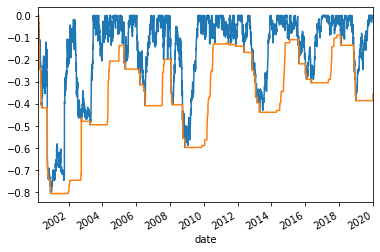

In [228]:
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = df_AAPL['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = df_AAPL['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()
daily_drawdown.plot()
max_daily_drawdown.plot()
plt.show()

In [226]:
days = (df_AAPL.index[-1] - df_AAPL.index[0]).days
cagr = ((((df_AAPL['Adj Close'][-1]) / df_AAPL['Adj Close'][1])) ** (365.0/days)) - 1
print(cagr)

0.2396075688956365


**CAGR**
### $$
CAGR =(EV/BV)^{1/n} -1
$$
<br>
EV = Investments ending value<br>
BV = Investment’s beginning value<br> 
n = the number of periods. 
 